In [1]:
#This program performs a Stochastic Simulation Algorithm on birth-death process for multiple observations
# 0 -> X -> 0
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Initializations here
nt=5000                      #indicates the number of reactions to consider
M=30                         #number of individuals
trueA=30                      #birth parameter
trueB=0.2                    #death parameter
true_alpha=18/5              #alpha delay parameter
true_beta=3/5                #beta delay parameter
N=20                         #number of unit intervals to consider in subsampling
x=np.zeros((nt+1,M))         #molecule count 
t_x=np.zeros((nt+1,M))       #reaction time of fully-observed trajectory
A=np.zeros(M)                #birth parameter samples 
B=np.zeros(M)                #death parameter samples
alpha=np.zeros(M)            #delay alpha parameter
beta=np.zeros(M)             #delay beta parameter
x[0,0:M]=0                 #initial molecule count
t_x[0,0:M]=0                  #initial time of fully-observed trajectory 
v=np.array([1, -1 ])          #reaction vectors
delay_vec=np.zeros([nt,M])

In [3]:
#Perform the iteration
S=np.array([1 ,-1])
for l in range(M):
    xx=np.zeros((nt+1))           #dummy variable for molecule count 
    t_xx=np.zeros((nt+1))         #dummy variable for reaction time 
    xx[0]=x[0,l]
    t=t_xx[0]
    A[l]=np.random.gamma(trueA*(1/2),2)    #(15,1/2)
    B[l]=np.random.gamma(trueB*10,1/10)    #(2,10)
    alpha[l]=np.random.gamma(true_alpha*10,1/10)   #(36,10)
    beta[l]=np.random.gamma(true_beta*10,1/10)     #(6,10)
    q=[]
    count=0
    for i in range(nt):
        a=np.array([A[l], B[l]*xx[i]] )
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        a_0=cumsum_a[len(cumsum_a)-1]
        t_wait=(1/a_0)*np.log(1/np.random.uniform(0,1,1))
        #t_wait=np.random.exponential(a_0)
        t_prop=t+t_wait
        q_check=len(q)
        delay=np.random.gamma(alpha[l],1.0/beta[l])
        if q_check == 0:
            t=t_prop
            t_xx[i+1]=t
            rand=np.random.uniform(0,1,1)
            u= cumsum_a>=rand*a_0
            if u[0]==True:
                delay_vec[count,l]=delay
                count=count+1
                q=np.sort(np.append(q,t+delay))
                xx[i+1]=xx[i]
            else:
                xx[i+1]=xx[i]+S[1]
        else:
            if t_prop<q[0]:
                t=t_prop
                t_xx[i+1]=t
                rand=np.random.uniform(0,1,1)
                u= cumsum_a>=rand*a_0
                if u[0]==True:
                    delay_vec[count,l]=delay
                    count=count+1
                    q=np.sort(np.append(q,t+delay))
                    xx[i+1]=xx[i]
                else:
                    xx[i+1]=xx[i]+S[1]
            else:
                t=q[0]
                t_xx[i+1]=t
                xx[i+1]=xx[i]+S[0]
                q=q[1:]
    x[:,l]=xx
    t_x[:,l]=t_xx

In [4]:
#subsample the trajectory on unit intervals
y=np.zeros((N+1,M))
y[0,0:M]=x[0,0:M]
for l in range(M):
    for i in range(1,N+1):
            for k in range(nt+1): 
                if t_x[k,l]>i-1 and t_x[k,l]<i:
                    y[i,l]=x[k,l];           

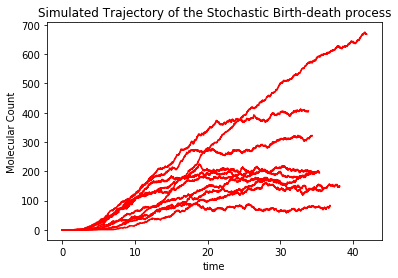

In [5]:
#plot the trajectory
plt.plot(t_x[0:3000,0:10],x[0:3000,0:10],'r')
plt.title('Simulated Trajectory of the Stochastic Birth-death process')
plt.xlabel('time')
plt.ylabel('Molecular Count')
plt.show()

In [6]:
#save the simulated values into .csv files
columns=' ' 
#np.savetxt("full.csv", x, delimiter=",",header=columns)
#np.savetxt("full_time.csv", t_x, delimiter=",",header=columns)
np.savetxt("subsampled.csv", y, delimiter=",",header=columns)
np.savetxt("B.csv", B, delimiter=",",header=columns)
#np.savetxt("delay.csv", delay_vec, delimiter=",",header=columns)
np.save("A.npy",A)
np.save("B.npy",B)
np.save("alpha.npy",alpha)
np.save("beta.npy",beta)

In [ ]:
print(np.mean(A))
print(np.var(A))
print(np.mean(B))
print(np.var(B))
print(np.mean(alpha))
print(np.var(alpha))
print(np.mean(beta))
print(np.var(beta))

In [ ]:
import numpy as np
true_A=np.load("A.npy")
true_B=np.load("B.npy")
columns=' '
np.savetxt("true_A.csv", true_A, delimiter=",",header=columns)
np.savetxt("true_B.csv", true_B, delimiter=",",header=columns)

In [ ]:
import numpy as np
x=np.array([1,2,3])
x[len(x)-1]

In [ ]:
np.savetxt("delay.csv", delay_vec, delimiter=",",header=columns)

In [ ]:
alp=np.load('alpha.npy')
bet=np.load('beta.npy')

In [ ]:
alp[0]/bet[0]

In [ ]:
alp

In [ ]:
bet

In [ ]:
alp/bet

In [4]:
abeta=np.load('beta.npy')
np.savetxt("A.csv", abeta, delimiter=",",header=" ")

In [5]:
abeta

array([0.64332748, 0.6015446 , 0.6949848 , 0.26271938, 0.42734159,
       0.33281463, 0.63879292, 0.43627409, 0.67873005, 0.65015173,
       0.60156206, 0.32810111, 0.44325792, 0.61649944, 0.50182537,
       0.71250495, 0.8079948 , 0.21512617, 0.48990294, 1.10642477,
       0.38039112, 0.84111437, 0.74887524, 0.96436127, 0.32897053,
       0.32218236, 0.46343863, 0.48745639, 0.72677153, 0.98219177])

In [ ]:
BB=np.load('B.npy')

In [ ]:
BB